<a href="https://colab.research.google.com/github/Drew128/Task20200209/blob/master/Task_test3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Test_4.csv to Test_4.csv


In [45]:
import pandas as pd
import numpy as np

df = pd.read_csv("Test_4.csv", delimiter=";")
df.head()

,sender_id,platform_id,time_stamp,gender,reg_date
0,3207526951,6,16.03.2017 13:35,m,26.01.2017
1,3207526951,6,16.03.2017 9:09,m,26.01.2017
2,3207526951,6,16.03.2017 9:09,m,26.01.2017
3,3207526951,6,16.03.2017 12:13,m,26.01.2017
4,3207526951,6,15.03.2017 14:01,m,26.01.2017


In [0]:
# to do
# axes: gender, date registration (before test, after test), platform, group(A/B)
# metric seems like log count per user

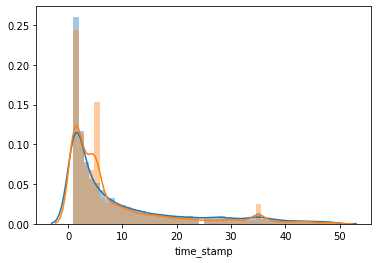

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cnt_per_user = df.groupby(['sender_id', 'gender']).count()
cnt_per_user['gender'] = cnt_per_user.index.get_level_values(1)
m = cnt_per_user['time_stamp'][(cnt_per_user['time_stamp'] < 50) & (cnt_per_user['gender'] == 'm')]
f = cnt_per_user['time_stamp'][(cnt_per_user['time_stamp'] < 50) & (cnt_per_user['gender'] == 'f')]
sns.distplot(m)
sns.distplot(f)


